In [1]:
pip install statsmodels numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the dataset
data = pd.read_csv('pre_data.csv', parse_dates=['Date'], index_col='Date')

In [5]:
print(data.head())

            Organization_ID  Energy_Consumption_kWh  Temperature_C  \
Date                                                                 
2021-01-01                7                 1173.57           36.3   
2021-01-02                4                  812.70           17.4   
2021-01-03                8                  824.89           29.4   
2021-01-04                5                 1040.92           13.1   
2021-01-05                7                  879.47           17.0   

            Humidity_%  Wind_Speed_kmh  Precipitation_mm Weather_Condition  
Date                                                                        
2021-01-01          78            17.7              10.0            Cloudy  
2021-01-02          21             6.7               2.0            Cloudy  
2021-01-03          95             8.1               0.0             Snowy  
2021-01-04          29            11.4               0.0             Sunny  
2021-01-05          63             3.5         

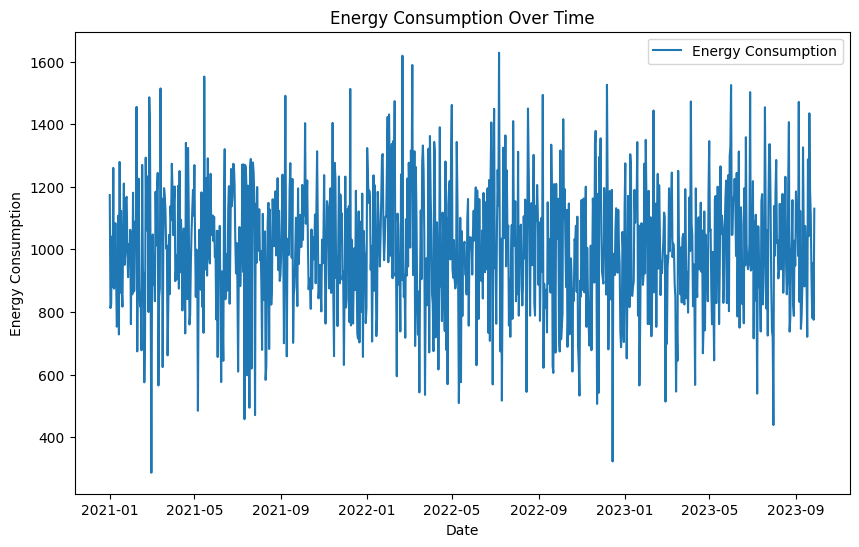

In [9]:
# Visualize the data
plt.figure(figsize=(10,6))
plt.plot(data['Energy_Consumption_kWh'], label='Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

In [10]:
# Train-test split (80% for training, 20% for testing)
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

In [11]:
# Fit the SARIMA model
# (p, d, q): ARIMA model parameters
# (P, D, Q, S): Seasonal parameters (S is the length of seasonality)

# Define SARIMA order and seasonal order
sarima_order = (1, 1, 1)  # ARIMA parameters (p,d,q)
seasonal_order = (1, 1, 1, 12)  # Seasonal parameters (P,D,Q,S)

In [13]:
# Create and fit the SARIMA model
model = SARIMAX(train_data['Energy_Consumption_kWh'], order=sarima_order, seasonal_order=seasonal_order)
sarima_model = model.fit(disp=False)

/home/jovyan/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/jovyan/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [14]:
# Make predictions on the test data
predictions = sarima_model.predict(start=len(train_data), end=len(data)-1, dynamic=False)


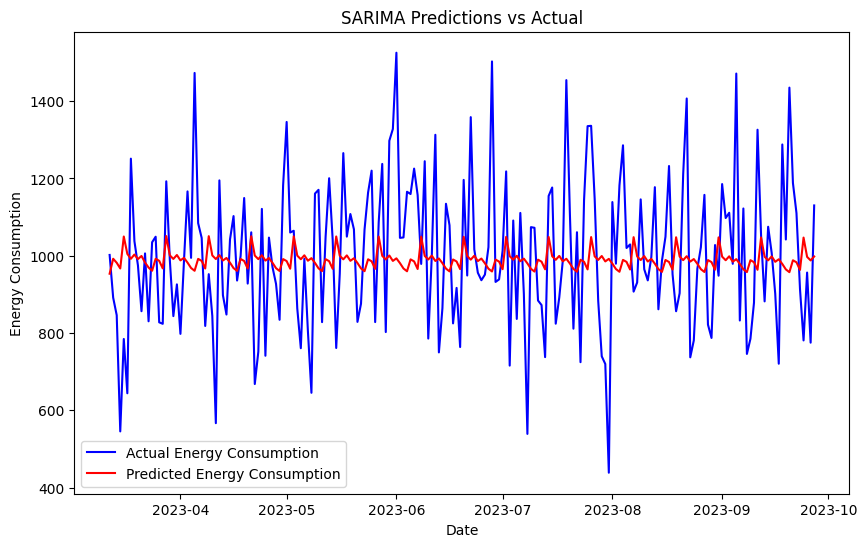

In [16]:
# Plot predictions vs actual data
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['Energy_Consumption_kWh'], label='Actual Energy Consumption', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Energy Consumption', color='red')
plt.title('SARIMA Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

In [18]:
# Calculate accuracy using RMSE and R-squared
rmse = mean_squared_error(test_data['Energy_Consumption_kWh'], predictions, squared=False)
r2 = r2_score(test_data['Energy_Consumption_kWh'], predictions)

/home/jovyan/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
# Display accuracy metrics
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 196.27904669322413
R-squared: -0.02270265695103202


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate the accuracy metrics
mae = mean_absolute_error(test_data['Energy_Consumption_kWh'], predictions)
rmse = np.sqrt(mean_squared_error(test_data['Energy_Consumption_kWh'], predictions))
mape = np.mean(np.abs((test_data['Energy_Consumption_kWh'] - predictions) / test_data['Energy_Consumption_kWh'])) * 100
accuracy = 100-mape

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Accuracy : {accuracy}%")


Mean Absolute Error (MAE): 156.4973595688294
Root Mean Squared Error (RMSE): 196.27904669322413
Mean Absolute Percentage Error (MAPE): 16.560126363043437%
Accuracy : 83.43987363695656%
